In [ ]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
from script.multi_points_modeling import multi_points_modeling, multi_points_modeling_multi_scaled
TI = np.loadtxt('ti_strebelle.dat', skiprows = 3).reshape(250,250,1)

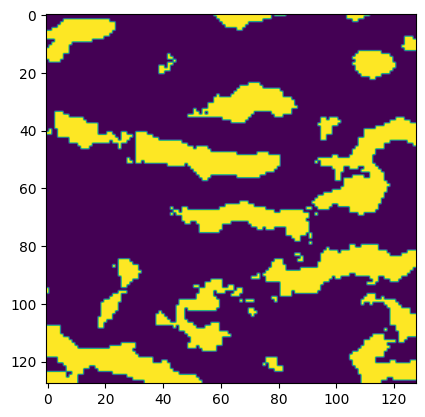

In [ ]:
##########################################
##  original demo for 128x128x1         ##
##########################################

random_seed = 77778
n_real = 1
real_nx, real_ny, real_nz = 128, 128, 1
template_size = [5, 5, 1]
level_size = 2
n_level = 5 # 1 - no multi-scael, 2 - 2 levels, 3 - 3 levels, 4 - 4 levels

real = multi_points_modeling_multi_scaled(TI, n_level, level_size, template_size, random_seed, real_nx, real_ny, real_nz)
plt.imshow(real)

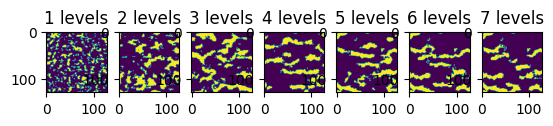

In [46]:
##########################################
##  Sensitivity test for 128x128x1      ##
##########################################
random_seed = 77778
n_real = 1
real_nx, real_ny, real_nz = 128, 128, 1
template_size = [5, 5, 1]
level_size = 2
n_levels = [1,2,3,4,5,6,7]
plt.figure(figsize = (5*len(n_levels), 5))
for i, n_level in enumerate(n_levels, 1):
    plt.subplot(1,len(n_levels), i)
    real = multi_points_modeling_multi_scaled(TI, n_level, level_size, template_size, random_seed, real_nx, real_ny, real_nz)
    plt.imshow(real)
    plt.title(f'{n_level} levels')

In [ ]:
##########################################
##  Sensitivity test for 128x128x1      ##
##########################################
random_seed = 77778
n_real = 1
real_nx, real_ny, real_nz = 128, 128, 1
template_size = [5, 5, 1]
level_size = 2
n_level = 3
template_sizes = [3, 5, 7, 9, 11]
plt.figure(figsize = (5*len(template_sizes), 5))
for i, size in enumerate(template_sizes, 1):
    template_size = [size, size, 1]
    plt.subplot(1,len(n_levels), i)
    real = multi_points_modeling_multi_scaled(TI, n_level, level_size, template_size, random_seed, real_nx, real_ny, real_nz)
    plt.imshow(real)
    plt.title(f'{size} template size')

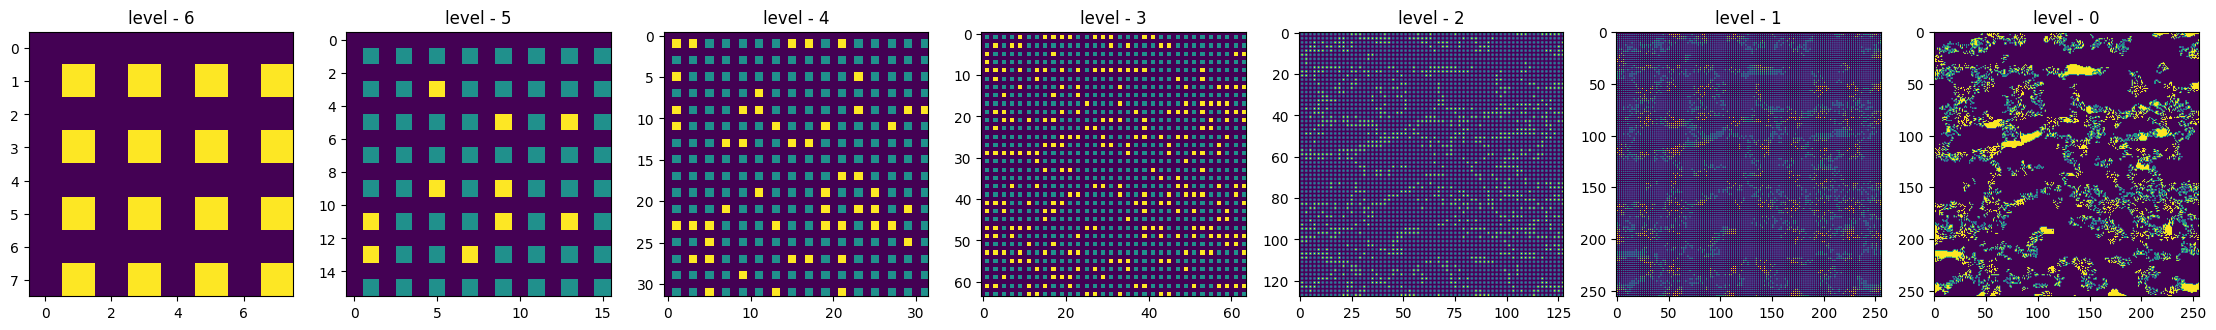

In [ ]:
random_seed = 77778
n_real = 1
real_nx, real_ny, real_nz = 128, 128, 1
template_size = [5, 5, 1]
level_size = 2
n_level = 7 # 1 - no multi-scael, 2 - 2 levels, 3 - 3 levels, 4 - 4 levels

TI_s, grid_size_s = [], []
nx, ny, nz = real_nx, real_ny, real_nz
for level in range(n_level):
    TI_s.append(TI[::level_size**level, ::level_size**level, ::level_size**level])
    grid_size_s.append((nx, ny, nz))
    nx, ny, nz = round(nx/level_size), round(ny/level_size), 1


plt.figure(figsize=(4*n_level,4))

real_s = []
real = np.ones(grid_size_s[-1]) * -1
for idx, (level, TI_at_level, grid_size_at_level) in enumerate(zip(range(n_level)[::-1],TI_s[::-1], grid_size_s[::-1])):
    real = multi_points_modeling(TI_at_level, 
                                 template_size, 
                                 random_seed, 
                                 grid_size_at_level[0], grid_size_at_level[1], grid_size_at_level[2], 
                                 real)
    real_s.append(real)
    if level == 0:
        break
    real_next = np.ones(grid_size_s[level-1]) * -1
    real_next[1::level_size, 1::level_size, :] = real
    real = real_next.copy()
    plt.subplot(1,n_level, idx+1)
    plt.title(f'level - {level}')
    plt.imshow(real_next)

plt.subplot(1,n_level, idx+1)
plt.title(f'level - {level}')
plt.imshow(real)

In [29]:
real.mean()

0.186279296875

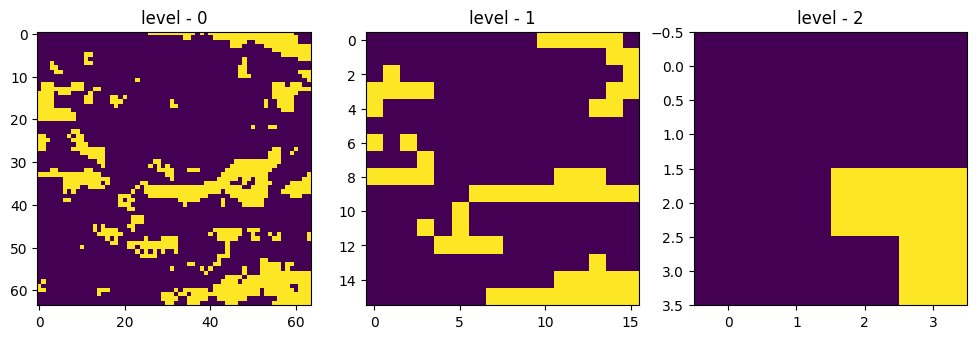

In [10]:
plt.figure(figsize=(4*n_level,4))
for i in range(n_level):
    plt.subplot(1,n_level, i+1)
    plt.title(f'level - {i}')
    plt.imshow(real_s[-i-1])

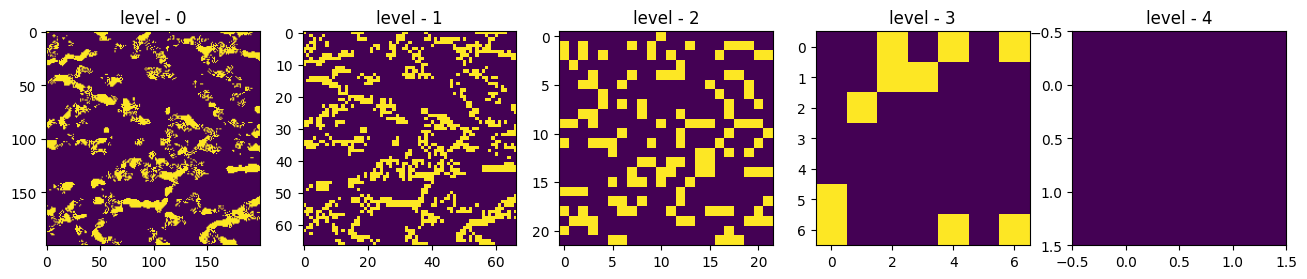

In [ ]:
# training image per different level - 0(original), 1, 2(coarser), ...
templeate_size = [3, 3, 1]
level_size = 2
n_level = 6
plt.figure(figsize = (16, 4))

for level in range(n_level):
    plt.subplot(1, n_level, level+1)
    plt.imshow(TI[::level_size**level, ::level_size**level, 0])

# realization extent per different levels
real_nx, real_ny, real_nz = 100, 100, 1
nx, ny, nz = real_nx, real_ny, real_nz
for level in range(n_level):
    print(f'at level - {level}:')
    print(f'    {nx} x {ny} x {nz}')
    nx, ny, nz = round(nx/level_size), round(ny/level_size), round(nz/level_size)

